In [4]:
file=open(r'Homework_sampledata1.txt','r')
lines=file.readlines()
file.close()
lines=lines[1:]
for i in range(len(lines)):
    lines[i]=lines[i].split()[1:]
for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]=float(lines[i][j])


In [5]:
lines

[[10.5, 7.3, 10.8, 18.2, 20.0, 25.3, 27.2, 25.1, 25.8, 23.0, 24.9, 12.6],
 [9.8, 10.4, 10.7, 18.0, 25.4, 24.8, 26.6, 26.1, 26.7, 23.5, 20.9, 13.9],
 [10.7, 11.0, 11.7, 18.8, 25.4, 26.5, 27.4, 25.8, 25.1, 24.5, 20.4, 17.7],
 [15.1, 12.9, 12.4, 20.4, 26.5, 25.2, 27.2, 25.3, 26.0, 23.0, 23.1, 20.5],
 [13.5, 11.4, 16.0, 22.4, 24.0, 26.0, 26.2, 26.2, 23.5, 22.7, 22.5, 16.7],
 [16.0, 11.0, 16.7, 23.6, 24.0, 26.2, 25.5, 26.4, 24.6, 22.8, 23.8, 17.6],
 [15.8, 10.3, 17.1, 23.6, 25.1, 27.8, 25.0, 25.0, 24.7, 24.4, 19.6, 16.4],
 [15.8, 12.1, 16.9, 26.4, 25.1, 24.8, 25.8, 26.3, 25.3, 24.1, 18.5, 12.7],
 [18.0, 11.7, 17.8, 23.8, 22.5, 26.2, 25.6, 24.3, 22.7, 24.0, 17.2, 12.6],
 [20.2, -99.0, 18.0, 23.8, 19.8, 24.9, 26.8, 24.9, 23.7, 25.5, 16.0, 16.9],
 [18.3, 10.6, 17.5, 24.3, 22.4, 25.4, 27.0, 25.7, 24.9, 24.6, 16.1, 14.5],
 [20.9, 10.9, 18.1, 24.8, 23.2, 26.0, 24.6, 25.2, 25.0, 23.9, 16.9, 16.9],
 [17.4, 11.3, 19.0, 22.6, 21.4, 26.9, 27.5, 26.9, 24.5, 21.9, 17.9, 18.0],
 [14.5, 10.8, 18.5, 23.7, 

# Exercise1

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
for i in range (len(lines)):
    for j in range (len(lines[i])):
        if lines[i][j] == -99:
            lines[i][j] = np.nan
        lines[i][j]=lines[i][j]
lines   

[[10.5, 7.3, 10.8, 18.2, 20.0, 25.3, 27.2, 25.1, 25.8, 23.0, 24.9, 12.6],
 [9.8, 10.4, 10.7, 18.0, 25.4, 24.8, 26.6, 26.1, 26.7, 23.5, 20.9, 13.9],
 [10.7, 11.0, 11.7, 18.8, 25.4, 26.5, 27.4, 25.8, 25.1, 24.5, 20.4, 17.7],
 [15.1, 12.9, 12.4, 20.4, 26.5, 25.2, 27.2, 25.3, 26.0, 23.0, 23.1, 20.5],
 [13.5, 11.4, 16.0, 22.4, 24.0, 26.0, 26.2, 26.2, 23.5, 22.7, 22.5, 16.7],
 [16.0, 11.0, 16.7, 23.6, 24.0, 26.2, 25.5, 26.4, 24.6, 22.8, 23.8, 17.6],
 [15.8, 10.3, 17.1, 23.6, 25.1, 27.8, 25.0, 25.0, 24.7, 24.4, 19.6, 16.4],
 [15.8, 12.1, 16.9, 26.4, 25.1, 24.8, 25.8, 26.3, 25.3, 24.1, 18.5, 12.7],
 [18.0, 11.7, 17.8, 23.8, 22.5, 26.2, 25.6, 24.3, 22.7, 24.0, 17.2, 12.6],
 [20.2, nan, 18.0, 23.8, 19.8, 24.9, 26.8, 24.9, 23.7, 25.5, 16.0, 16.9],
 [18.3, 10.6, 17.5, 24.3, 22.4, 25.4, 27.0, 25.7, 24.9, 24.6, 16.1, 14.5],
 [20.9, 10.9, 18.1, 24.8, 23.2, 26.0, 24.6, 25.2, 25.0, 23.9, 16.9, 16.9],
 [17.4, 11.3, 19.0, 22.6, 21.4, 26.9, 27.5, 26.9, 24.5, 21.9, 17.9, 18.0],
 [14.5, 10.8, 18.5, 23.7, 22

C:\Users\PC\AppData\Local\Temp\ipykernel_11008\2877249021.py:9: UserWarning: The following kwargs were not used by contour: 'level'
  contour=plt.contourf(X,Y,data_masked,level=20,cmap='jet')


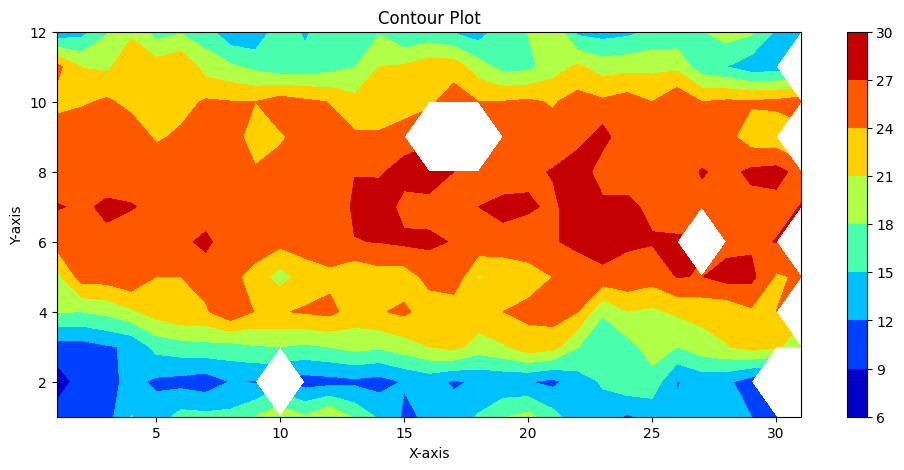

In [40]:
import numpy.ma as ma
data=np.array(lines)
data_masked=ma.masked_invalid(data)
data_masked=data_masked.T
x = np.linspace(1, 31, data_masked.shape[1])
y = np.linspace(1, 12, data_masked.shape[0])
X,Y=np.meshgrid(x,y)
plt.figure(figsize=(12,5))
contour=plt.contourf(X,Y,data_masked,level=20,cmap='jet')
plt.colorbar(contour)
plt.title('Contour Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


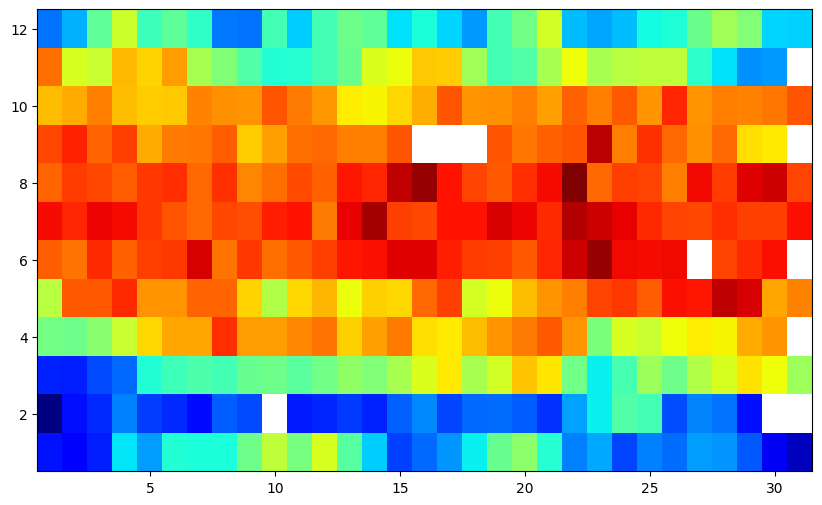

In [41]:
plt.figure(figsize=(10,6))
plt.pcolormesh(X,Y,data_masked,cmap='jet')
plt.show()

## exercise2
